## First generating sinc function then adding some noise that follows that sinc function. After that, training data passed through model1 and model2 to see the best fit. 


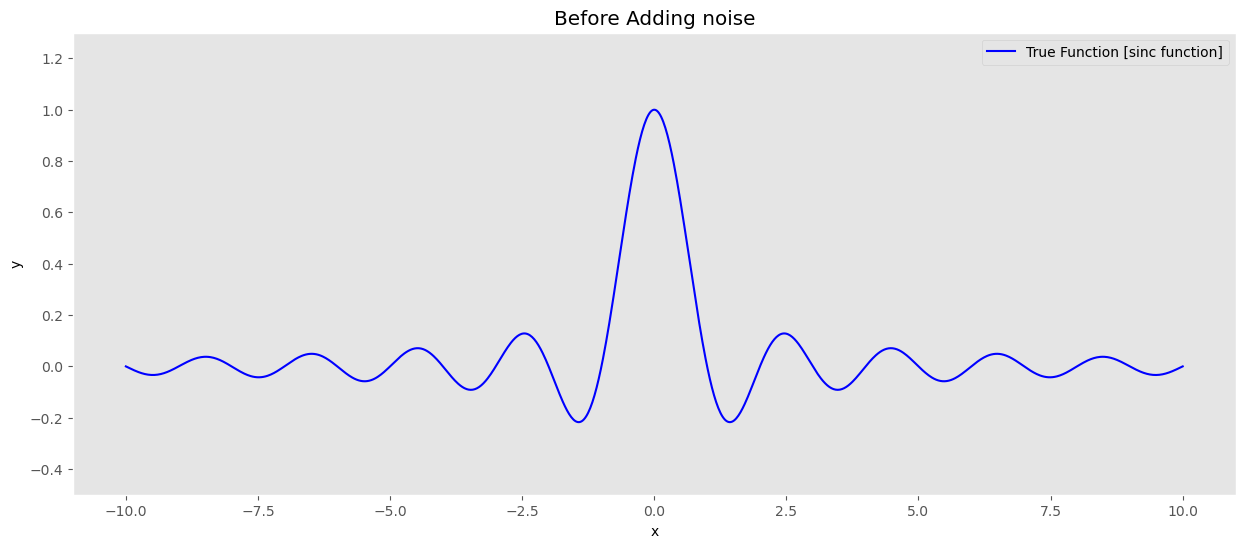

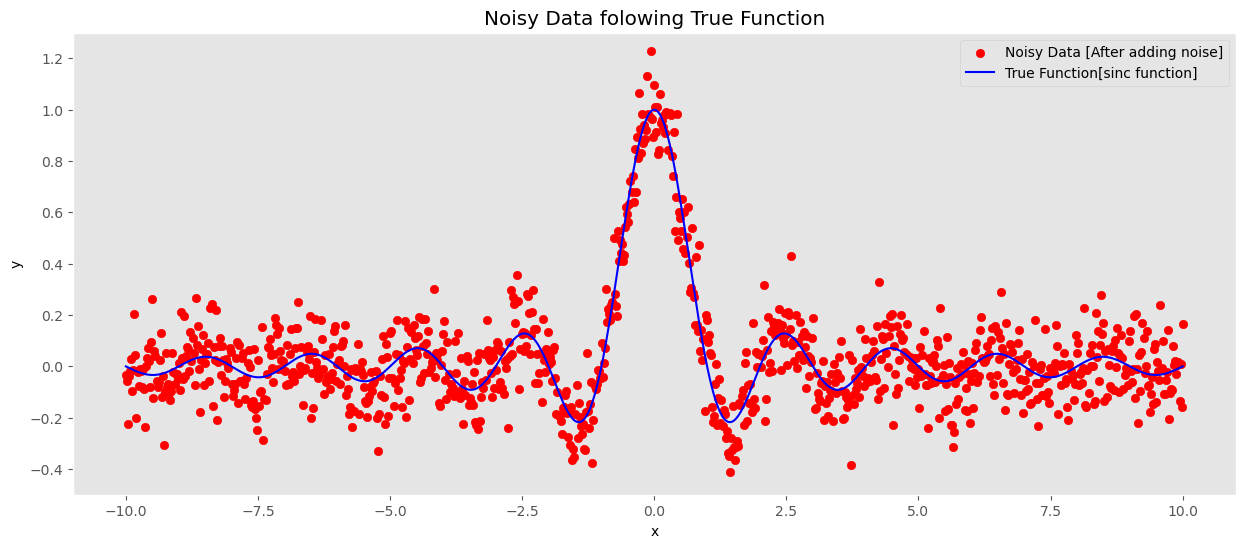

Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
Epoch [100/1000], Loss: 0.0214
Epoch [200/1000], Loss: 0.0149
Epoch [300/1000], Loss: 0.0148
Epoch [400/1000], Loss: 0.0148
Epoch [500/1000], Loss: 0.0147
Epoch [600/1000], Loss: 0.0147
Epoch [700/1000], Loss: 0.0147
Epoch [800/1000], Loss: 0.0146
Epoch [900/1000], Loss: 0.0146
Epoch [1000/1000], Loss: 0.0146


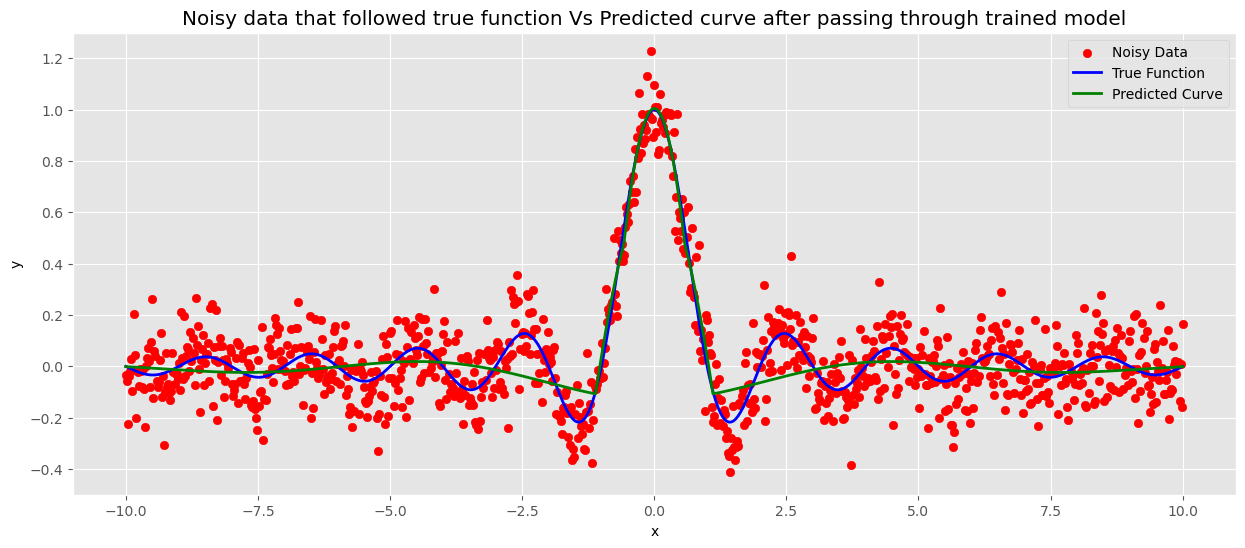

In [49]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt



# Generate noisy data
x = np.linspace(-10, 10, 1000)
y_true = np.sinc(x)
noise = np.random.normal(0, 0.1, size=len(x))
y_noisy = y_true + noise 




# Plot data without noise
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))

plt.ylim(-0.5,1.3)
plt.plot(x, y_true,'b', label='True Function [sinc function]')
plt.title('Before Adding noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Plot data with noise
plt.figure(figsize=(15, 6))


plt.ylim(-0.5,1.3)
#plt.scatter(x, y_noisy, 'r', label='Noisy Data [After adding noise]') 
plt.scatter(x, y_noisy, c='r', label='Noisy Data [After adding noise]') 
plt.plot(x, y_true, 'b', label='True Function[sinc function] ')
plt.title('Noisy Data folowing True Function')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()
plt.show()

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_noisy, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class SincNet(nn.Module):
    def __init__(self):
        super(SincNet, self).__init__()     # this is how to define three linear layers of model
        self.fc1 = nn.Linear(1, 10)         # it creates the first linear layer with 1 input neuron and 10 output neurons.
        self.fc2 = nn.Linear(10, 10)        # it creates the second linear layer with 10 input neurons (matching the output neurons of the previous layer) and 10 output neurons
        self.fc3 = nn.Linear(10, 1)         # it creates the third linear layer with 10 input neurons and 1 output neuron

    def forward(self, x):                   # it defines the computational methods and implements the forward pass to the model with an input x, it performs the following operations
        x = torch.sin(x) / x                # torch.sin = np.sin
        x = torch.relu(self.fc1(x))         # ReLU (Rectified Linear Unit) is an activation function that introduces non-linearity to the model and applies ReLU activation to the output
        x = torch.relu(self.fc2(x))         # it applies the second linear layer with ReLU activation
        x = self.fc3(x)                     # it applies the third linear layer without any activation function, resulting in the final output of the model
        return x

# Create an instance of the model (variable to carry the model)
model = SincNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()                                   # Mean Squared Error (MSE) loss function measures the average squared difference between the predicted values and the true values
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# This argument specifies the parameters of the model that need to be optimized.
# Lr = learning rate for the optimizer (step size at which the optimizer updates the model's parameters during training. A larger learning rate allows for faster convergence but may risk overshooting the optimal values. A smaller learning rate provides more cautious updates but may take longer to converge or get stuck in suboptimal solutions)
# The torch.optim.Adam optimizer combines the ideas of both Adaptive Moment Estimation (Adam) and Root Mean Square Propagation (RMSProp) algorithms.
# It adapts the learning rate for each parameter based on the average of past gradients and the second moment of the gradients.
# This adaptive learning rate adjustment helps in faster convergence and better performance on various problem domains.

print("Optimizer =", optimizer)         # It will make you understand how is the optimization going on.

# Train the model
num_epochs = 1000                       # You can train more or less ,  num > N means more better curve fit with the data though not always
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate predictions (on x data)
with torch.no_grad():
    y_pred = model(x_tensor).numpy()
# Plot the original data, noisy data, predicted curve
plt.style.use('ggplot')
    
plt.figure(figsize=(15, 6))  
plt.ylim(-0.5,1.3)

plt.scatter(x, y_noisy, color='r', label='Noisy Data')
plt.plot(x, y_true, color='b',label='True Function', linewidth=2)
plt.plot(x, y_pred,color='g', label='Predicted Curve', linewidth=2)

plt.title('Noisy data that followed true function Vs Predicted curve after passing through trained model') 

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Epoch [100/1000], Model 2 Loss: 0.0141
Epoch [200/1000], Model 2 Loss: 0.0119
Epoch [300/1000], Model 2 Loss: 0.0113
Epoch [400/1000], Model 2 Loss: 0.0110
Epoch [500/1000], Model 2 Loss: 0.0109
Epoch [600/1000], Model 2 Loss: 0.0107
Epoch [700/1000], Model 2 Loss: 0.0110
Epoch [800/1000], Model 2 Loss: 0.0108
Epoch [900/1000], Model 2 Loss: 0.0107
Epoch [1000/1000], Model 2 Loss: 0.0107


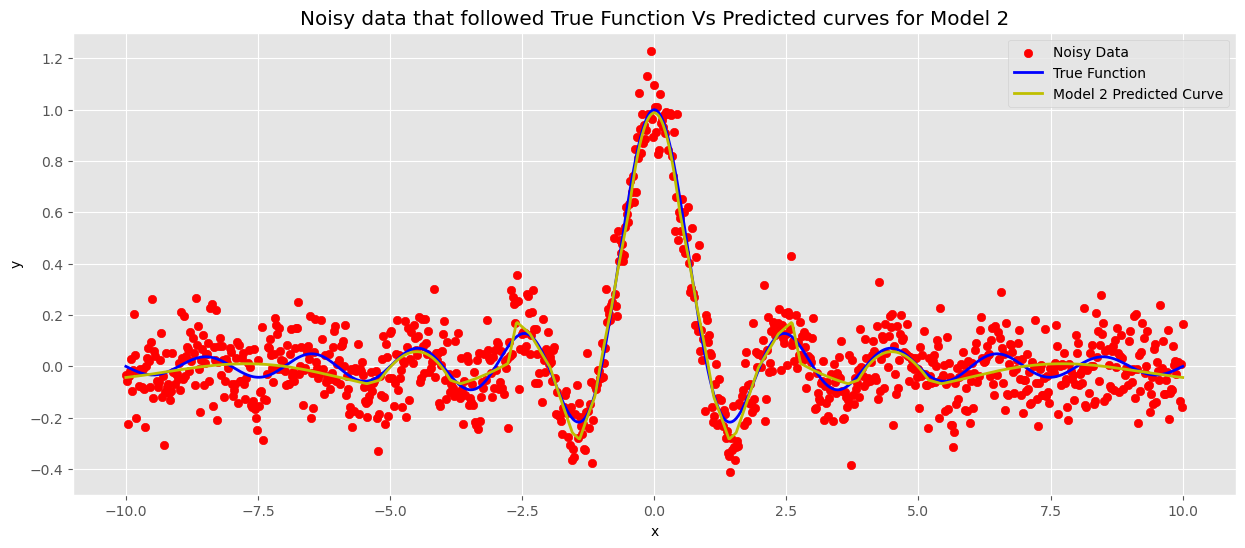

In [51]:
# Define the second neural network model (model2)
class SincNet2(nn.Module):
    def __init__(self):
        super(SincNet2, self).__init__()
        self.fc1 = nn.Linear(1, 40)
        self.fc2 = nn.Linear(40, 40)
        self.fc3 = nn.Linear(40, 40)
        self.fc4 = nn.Linear(40, 1)
    def forward(self, x):
        x = torch.sin(x) / x
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
model2 = SincNet2()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

# Train  models
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass for model1
    #outputs1 = model1(x_tensor)
    #loss1 = criterion(outputs1, y_tensor)
    #optimizer1.zero_grad()
    #loss1.backward()
    #optimizer1.step()

    # Forward pass for model2
    outputs2 = model2(x_tensor)
    loss2 = criterion(outputs2, y_tensor)
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Model 2 Loss: {loss2.item():.4f}')

# Generate predictions for both models
with torch.no_grad():
    #y_pred1 = model1(x_tensor).numpy()
    y_pred2 = model2(x_tensor).numpy()

# Plot the original data, noisy data, and predicted curves for both models
plt.figure(figsize=(15, 6))
plt.ylim(-0.5, 1.3)
plt.scatter(x, y_noisy, color='r', label='Noisy Data')
plt.plot(x, y_true, color='b', label='True Function', linewidth=2)

plt.plot(x, y_pred2, color='y', label='Model 2 Predicted Curve', linewidth=2)

plt.title('Noisy data that followed True Function Vs Predicted curves for Model 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

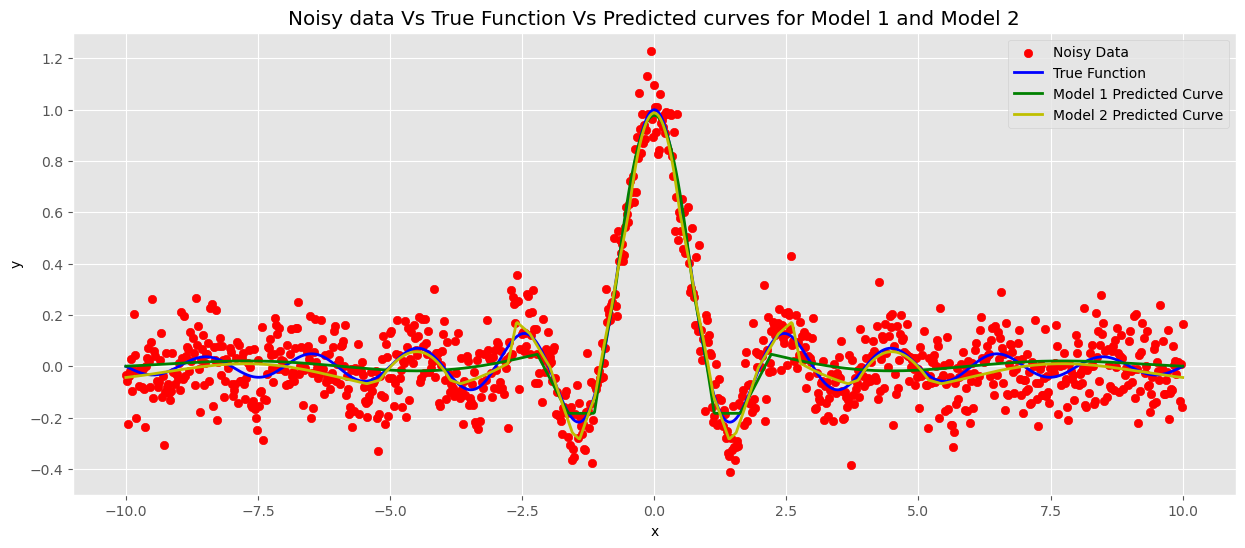

In [52]:
plt.figure(figsize=(15, 6))
plt.ylim(-0.5, 1.3)

plt.scatter(x, y_noisy, color='r', label='Noisy Data')
plt.plot(x, y_true, color='b', label='True Function', linewidth=2)
plt.plot(x, y_pred1, color='g', label='Model 1 Predicted Curve', linewidth=2)
plt.plot(x, y_pred2, color='y', label='Model 2 Predicted Curve', linewidth=2)

plt.title('Noisy data Vs True Function Vs Predicted curves for Model 1 and Model 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()